## Zomato Dataset

In [1]:
import pandas as pd

KeyboardInterrupt: 

In [ ]:
 import numpy as np
 import matplotlib.pyplot as plt 
 import seaborn as sns 
%matplotlib inline

In [ ]:
df = pd.read_csv('zomato.csv',encoding='latin-1' )
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


### What we will do in this data set
1. Missing Vlaues
2. Explore numerical 
3. Explore 
4. Finding Relationships bw Features


#### 1.Missing Values

In [ ]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
[j for j in df.columns if df[j].isnull().sum()>0]

['Cuisines']

<Axes: >

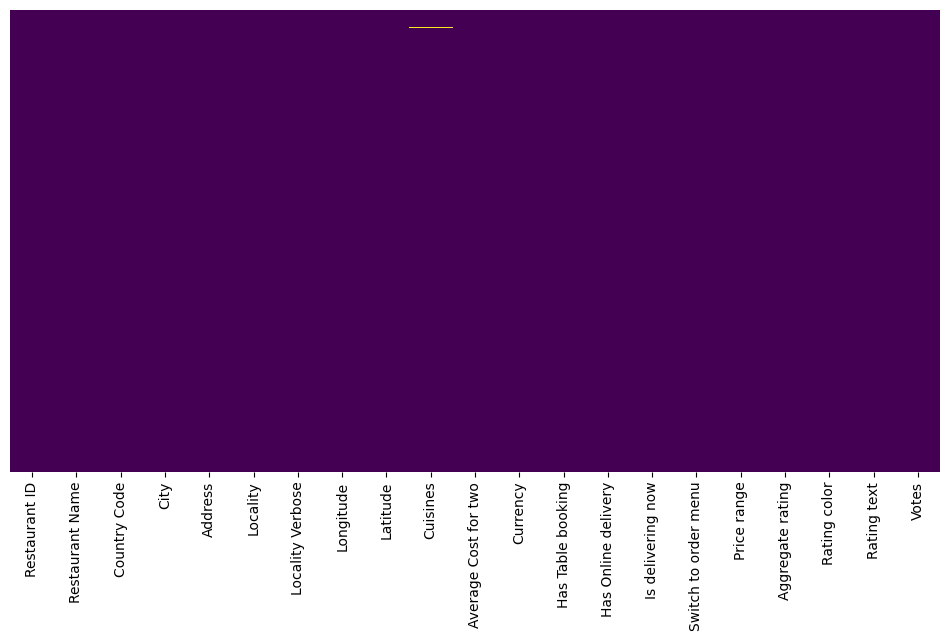

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] =(12,6)
sns.heatmap(df.isnull(),yticklabels=False, cbar= False, cmap = 'viridis' )

### Country 


In [ ]:
df_c= pd.read_excel('Country-code.xlsx')
df_c

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [ ]:
lidx = 0
f= pd.merge(df,df_c,on='Country Code', how='left')

In [ ]:
f.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines


In [ ]:
Country_names=f.Country.value_counts().index
Country_names.value_count()

AttributeError: 'Index' object has no attribute 'value_count'

In [ ]:
c_va

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

In [ ]:
c_va= f.Country.value_counts().values
c_va

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

#### Top 3 country who use Zomato the most

([<matplotlib.patches.Wedge at 0x16a6700c770>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94%'),
  Text(0.5876082086391032, -0.12131196618612707, '5%'),
  Text(0.5997744629358018, -0.01644972978715676, '1%')])

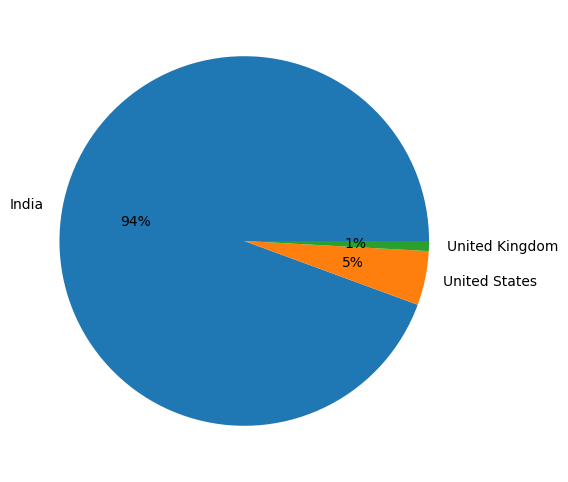

In [ ]:
plt.pie(c_va[:3],labels=Country_names[:3], autopct='%1.0f%%')

##### Observations:
1. India Has the most records or Transactions. 
2. US in 2nd and Uk is in 3rd. 

In [ ]:
ratings = f.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0: 'Rating Count'})

In [ ]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


#### Observations
1. when rate is 4.5 to 5 ---> Excellent 
2. when rate is 4.0 to 4.4 ---> Very Good
3. when rate is 3.5 to 3.9 ---> Good
4. when rate is 2.5 to 3.4  --->  Avg
5. when rate is 1.8 to 2.4  ---> Poor

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

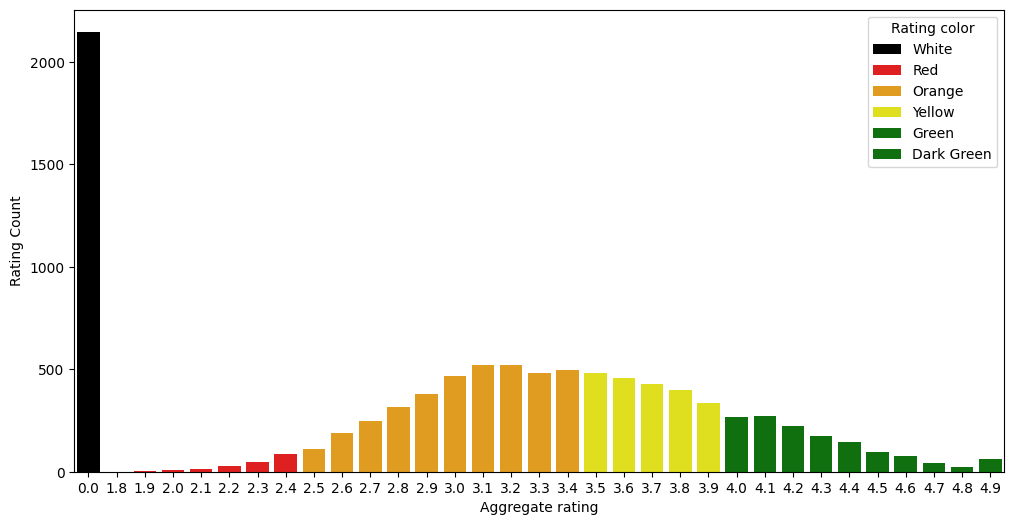

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] =(12,6)
sns.barplot(x= "Aggregate rating",y= "Rating Count", hue='Rating color', palette=['black','red', 'orange','yellow','green','green'] , data = ratings)

In [ ]:
f[f["Rating color"]== "White"].groupby('Country').size().reset_index().head()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


#### Observations

In [ ]:
f[['Country', 'Currency']].groupby(['Country', 'Currency']).size().reset_index()


,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [ ]:
f.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [ ]:
f['Country','Has Online delivery']

Country
India    2423
UAE        28
Name: count, dtype: int64

In [ ]:
f[f['Has Online delivery']=='Yes'].Country.value_counts()

In [ ]:
f[f['Has Online delivery' ,'Country' ]=='yes'].Country.value_counts()